In [244]:
%matplotlib inline

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pathlib import Path


In [245]:
DATA_DIR = Path(Path.home(),'OneDrive - Co-operators','Documents','DrivenData','WarmUp_Heart_Disease','data')
print(DATA_DIR)

C:\Users\EG65685\OneDrive - Co-operators\Documents\DrivenData\WarmUp_Heart_Disease\data


# Data description
slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

resting_blood_pressure (type: int): resting blood pressure

chest_pain_type (type: int): chest pain type (4 values)

num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy

fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl

resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)

serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl

oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

sex (type: binary): 0: female, 1: male

age (type: int): age in years

max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)

exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

# Load data

In [246]:
df_train_values = pd.read_csv(DATA_DIR / 'Train_Values.csv', index_col='patient_id')
df_train_labels = pd.read_csv(DATA_DIR / 'Train_Labels.csv', index_col='patient_id')
df_train = df_train_values.join(df_train_labels)
df_train.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# Are the classes balanced?
We want to make sure the classes are balanced so that when we cross validate we select the correct training data. They are pretty close, so we won't worry about the balance.

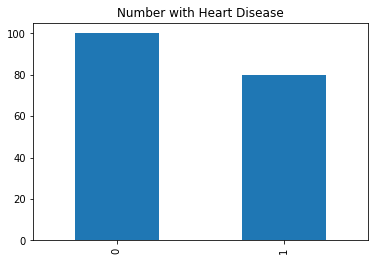

In [247]:
df_train_labels.heart_disease_present.value_counts().plot.bar(title='Number with Heart Disease')

# Investigate object-based features
The only object feature is thal. Let's see if we can understand it. `thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect`.

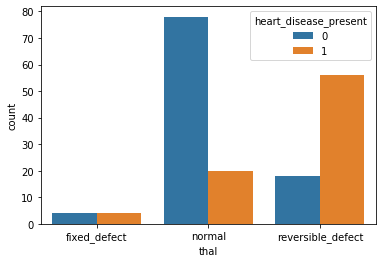

In [248]:
df_train.thal = df_train.thal.astype('category')
sns.countplot(x='thal',hue='heart_disease_present',data=df_train)
plt.show()

thal seems like a very good indicator of heart disease and should be kept in the feature list! Let's dummy variable these to be used later.

In [249]:
df_train = df_train.join(pd.get_dummies(df_train.thal,prefix='thal'))
df_train.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
patient_id,,,,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1


# Pearson Correlation
Now, I'll try to see if I can get any information from direct correlations of the variables with each other.

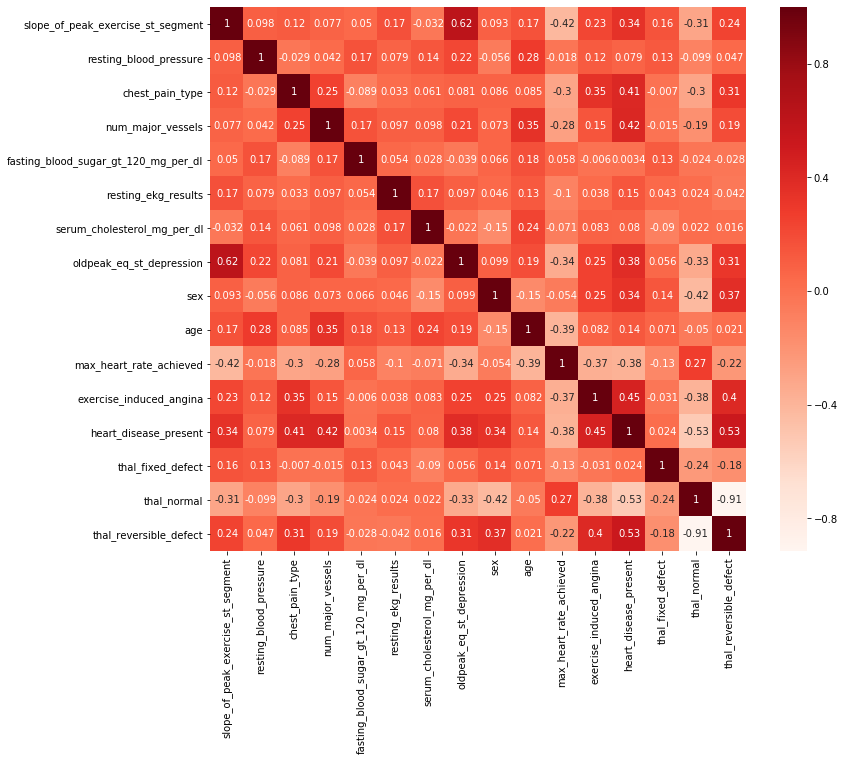

In [250]:
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Now, let's filter the features out that don't show a trong correlation. Here that is defined as a feature with mare than a 0.4 correlation coefficient.

In [251]:
cor_target = abs(cor["heart_disease_present"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_feature_names = relevant_features.keys().tolist()
df_train[relevant_feature_names].head()

,chest_pain_type,num_major_vessels,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
patient_id,,,,,,
0z64un,2,0,0,0,1,0
ryoo3j,3,0,0,0,1,0
yt1s1x,4,3,1,1,1,0
l2xjde,4,0,0,1,0,1
oyt4ek,1,0,0,0,0,1


We should also check the correlation between these features to not hold redundant information.

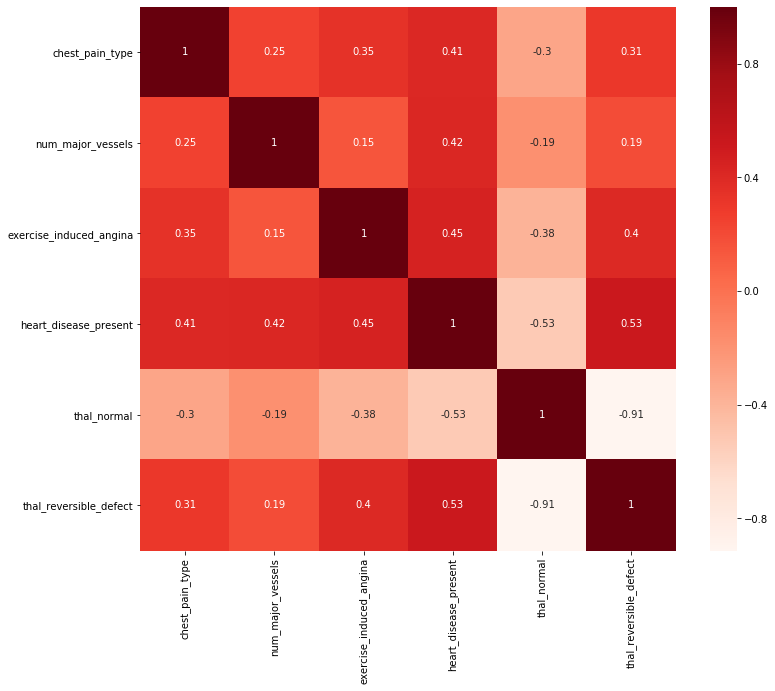

In [252]:
plt.figure(figsize=(12,10))
rel_cor = df_train[relevant_feature_names].corr()
sns.heatmap(rel_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Clearly `thal_normal` and `thal_reversible_defect` contain extremely similar information. For now we choose to include only thal_reversible defect.

In [253]:
relevant_feature_names.remove('thal_normal')
df_train = df_train[relevant_feature_names]
df_train.head()

,chest_pain_type,num_major_vessels,exercise_induced_angina,heart_disease_present,thal_reversible_defect
patient_id,,,,,
0z64un,2,0,0,0,0
ryoo3j,3,0,0,0,0
yt1s1x,4,3,1,1,0
l2xjde,4,0,0,1,1
oyt4ek,1,0,0,0,1


C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


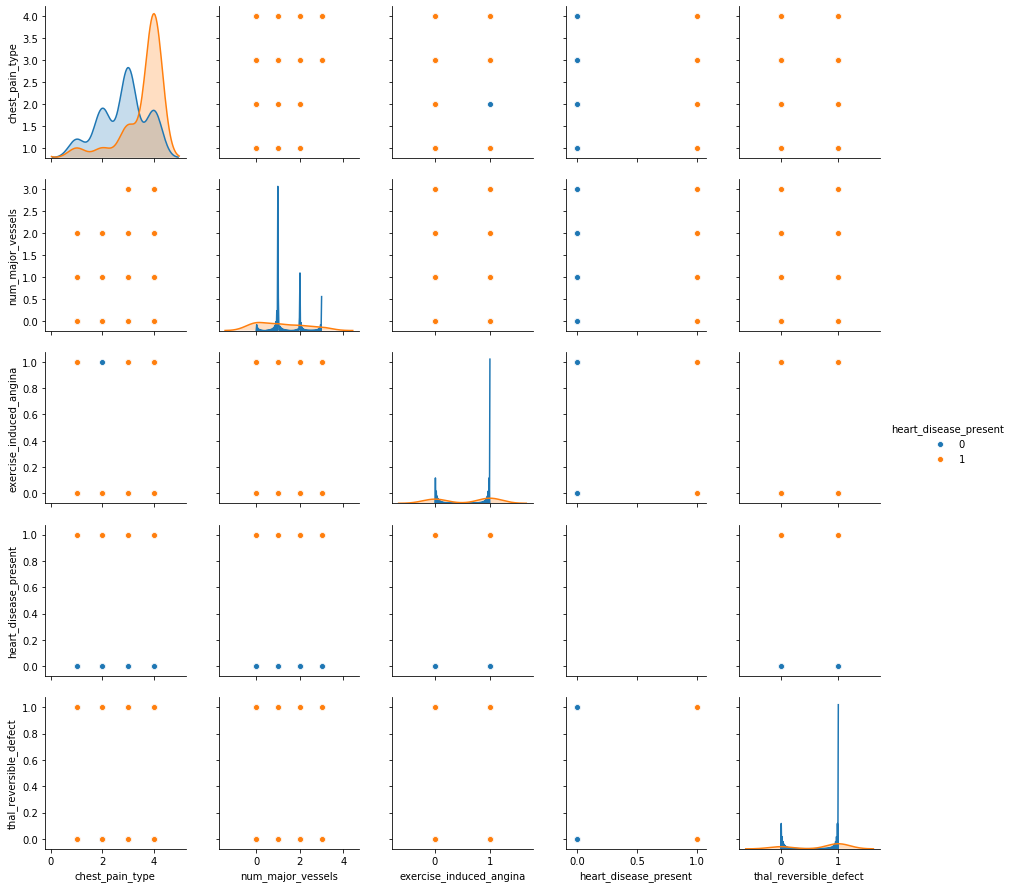

In [254]:
sns.pairplot(df_train, 
             hue='heart_disease_present', 
             vars=relevant_feature_names)

# Attempting the log-reg model

In [255]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.linear_model import LogisticRegression

# for combining the preprocess with model training
from sklearn.pipeline import Pipeline

# for optimizing parameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [256]:
pipe = Pipeline(steps=[('scale', StandardScaler()), 
                       ('logistic', LogisticRegression())])
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [257]:
param_grid = {'logistic__C': np.linspace(0.1,5,20), 
              'logistic__penalty': ['l1', 'l2']}
            #   'logistic__l1_ratio' : np.linspace(0,1,11) }
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, refit=True,
                  cv=3,scoring='neg_log_loss')
df_train_values.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [258]:
#drop the labels for the algorithm
y_train = df_train_labels
X_train = df_train_values.join(pd.get_dummies(df_train_values.thal,prefix='thal'))
relevant_feature_names.remove('heart_disease_present')
X_train = X_train[relevant_feature_names]

gs.fit(X_train, y_train)

C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='

In [259]:
print(gs.best_params_)
print(gs.score(X_train, y_train))

{'logistic__C': 0.6157894736842106, 'logistic__penalty': 'l2'}
-0.4122432674038545


In [260]:
test_values = pd.read_csv(DATA_DIR / 'test_values.csv', index_col='patient_id')
test_values = test_values.join(pd.get_dummies(test_values.thal,prefix='thal'))

X_test = test_values[relevant_feature_names]

y_pred = gs.predict_proba(X_test)[:, 1]

submission_format = pd.read_csv(DATA_DIR / 'submission_format.csv', index_col='patient_id')

my_submission = pd.DataFrame(data=y_pred,
                             columns=submission_format.columns,
                             index=submission_format.index)

my_submission.head()

,heart_disease_present
patient_id,
olalu7,0.207251
z9n6mx,0.171186
5k4413,0.825996
mrg7q5,0.234444
uki4do,0.661757


In [261]:
my_submission.to_csv(DATA_DIR / 'submission_basic_log_reg_with_features.csv')

#0.4118 {'logistic__C': 1, 'logistic__penalty': 'l2'} <-- Best out of this notebook.
#0.4122{'logistic__C': 0.6157894736842106, 'logistic__penalty': 'l2'}
